In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.special import erf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from mpl_toolkits.mplot3d import Axes3D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten
import PIL

In [20]:

plt.rcParams["figure.figsize"] = (9, 6)

## Exercise 12.1 ##


In this exercise we will compare the results of a deep neural network and a convolutional neural network on the MNIST data set. We can start by loading the dataset:


In [21]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


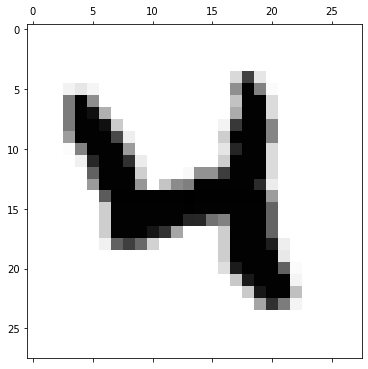

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [22]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
def create_model(N1,N2):
    # instantiate model
    model_DNN = Sequential()
    # add a dense all-to-all relu layer
    model_DNN.add(Dense(N1,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model_DNN.add(Dense(N2, activation='relu'))
    # apply dropout with rate 0.5
    model_DNN.add(Dropout(0.5))
    # soft-max layer
    model_DNN.add(Dense(num_classes, activation='softmax'))
    return model_DNN

In [24]:
# training parameters
batch_size = 32
epochs = 10
N1=50
N2=50

keras.backend.clear_session()
# train DNN and store training info in history
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['acc'])
historySGD = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreSGD = model_DNN.evaluate(X_test, Y_test, verbose=1)

keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
historyAdam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreAdam = model_DNN.evaluate(X_test, Y_test, verbose=1)


keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['acc'])
historyNadam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreNadam = model_DNN.evaluate(X_test, Y_test, verbose=1)
model_DNN.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.1035 - acc: 0.9721
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


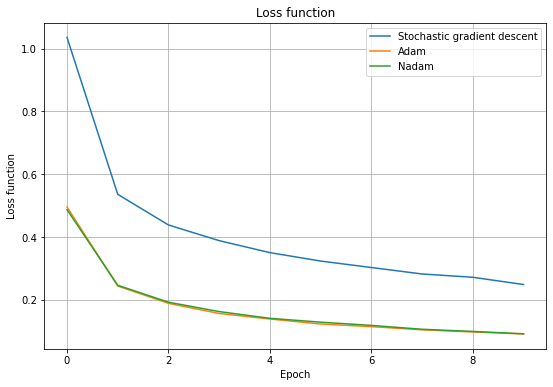

Text(0.5, 1.0, 'Accuracy')

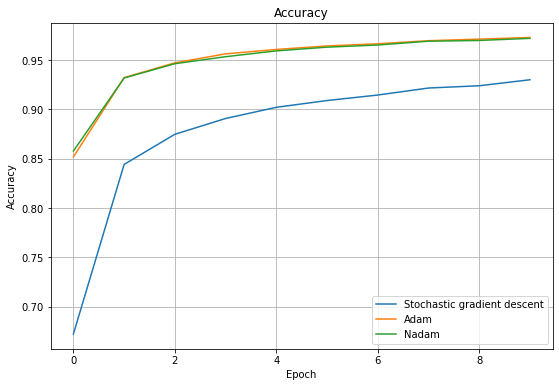

In [25]:
plt.plot(historySGD.history['loss'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['loss'],label='Adam')
plt.plot(historyNadam.history['loss'],label='Nadam')
plt.legend()
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss function')
plt.grid()
plt.show()
plt.plot(historySGD.history['acc'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['acc'],label='Adam')
plt.plot(historyNadam.history['acc'],label='Nadam')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.title('Accuracy')

In [26]:
print(f"Con lo stochastic gradient descent la loss sui dati di test vale {scoreSGD[0]:0.3f} e l'accuracy vale {scoreSGD[1]:0.3f}")
print(f"Con Adam la loss sui dati di test vale {scoreAdam[0]:0.3f} e l'accuracy vale {scoreAdam[1]:0.3f}")
print(f"Con Nadam la loss sui dati di test vale {scoreNadam[0]:0.3f} e l'accuracy vale {scoreNadam[1]:0.3f}")

Con lo stochastic gradient descent la loss sui dati di test vale 0.158 e l'accuracy vale 0.953
Con Adam la loss sui dati di test vale 0.102 e l'accuracy vale 0.973
Con Nadam la loss sui dati di test vale 0.103 e l'accuracy vale 0.972


As we can see even with a small deep neural netowrk(two fully connected layers, 50 neurons each) we can see a good accuracy. We can wonder how better the network becomes if we make it bigger(for example by adding a layer and by duplicating the number of neurons)

In [27]:
# training parameters
batch_size = 32
epochs = 10
N1=100
N2=400

keras.backend.clear_session()
# train DNN and store training info in history
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['acc'])
historySGD = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreSGD = model_DNN.evaluate(X_test, Y_test, verbose=1)

keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
historyAdam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreAdam = model_DNN.evaluate(X_test, Y_test, verbose=1)


keras.backend.clear_session()
model_DNN=create_model(N1,N2)
model_DNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Nadam(),
              metrics=['acc'])
historyNadam = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))
scoreNadam = model_DNN.evaluate(X_test, Y_test, verbose=1)
model_DNN.summary()

313/313 [==============================] - 1s 3ms/step - loss: 0.0874 - acc: 0.9792
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 400)               40400     
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 122,910
Trainable params: 122,910
Non-trainable params: 0
_________________________________________________________________


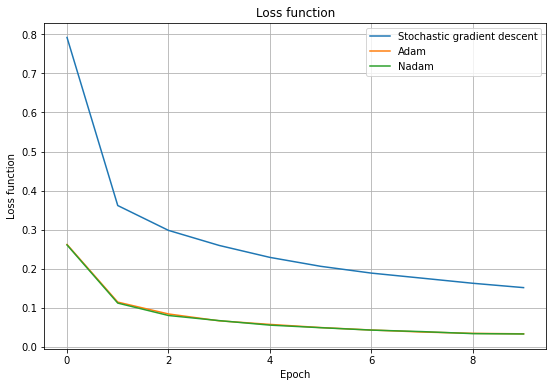

Text(0.5, 1.0, 'Accuracy')

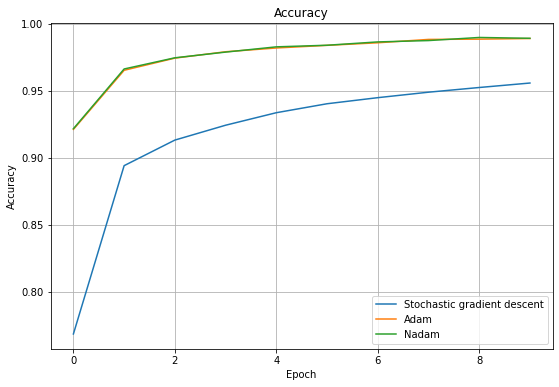

In [28]:
plt.plot(historySGD.history['loss'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['loss'],label='Adam')
plt.plot(historyNadam.history['loss'],label='Nadam')
plt.legend()
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss function')
plt.grid()
plt.show()
plt.plot(historySGD.history['acc'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['acc'],label='Adam')
plt.plot(historyNadam.history['acc'],label='Nadam')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.title('Accuracy')


## Exercise 12.02 ##
We can now go on and use a convolutional neural network to classify the data. The convolutional neural network have the advantage of intrinsical translational invariance, and are widely used in image

In [29]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [30]:
input_shape=(img_rows,img_cols,1)
model_CNN = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [31]:
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=SGD(),
              metrics=['acc'])
historySGD_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
scoreSGD_CNN = model_CNN.evaluate(X_test, Y_test, verbose=1)
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['acc'])
historyAdam_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))
scoreAdam_CNN = model_CNN.evaluate(X_test, Y_test, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 2.1134 - acc: 0.5278 - val_loss: 0.3810 - val_acc: 0.8916
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4650 - acc: 0.8534 - val_loss: 0.2596 - val_acc: 0.9255
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3610 - acc: 0.8869 - val_loss: 0.2228 - val_acc: 0.9337
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2954 - acc: 0.9085 - val_loss: 0.1643 - val_acc: 0.9491
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2511 - acc: 0.9219 - val_loss: 0.1406 - val_acc: 0.9582
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2231 - acc: 0.9299 - val_loss: 0.1230 - val_acc: 0.9631
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2076 - acc: 0.9353 - val_loss: 0.1301 - val_acc: 0.9614
Epoch 8/10
1875/1875 [==========================

What we learned tell us more about our skill in CNN design than the capability of a CNN, but from this analysis we should definitely prefer

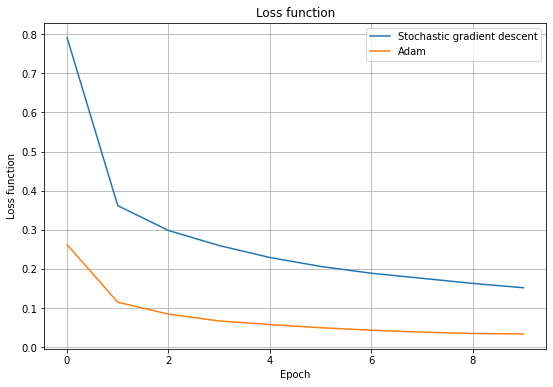

Text(0.5, 1.0, 'Accuracy')

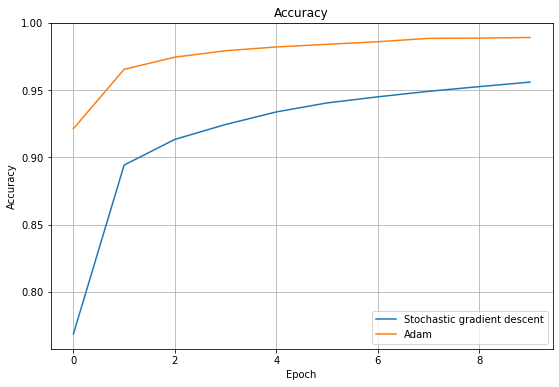

In [32]:
plt.plot(historySGD.history['loss'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['loss'],label='Adam')
plt.legend()
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.title('Loss function')
plt.grid()
plt.show()
plt.plot(historySGD.history['acc'],label='Stochastic gradient descent')
plt.plot(historyAdam.history['acc'],label='Adam')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.title('Accuracy')

As we can see both networks reach a higher accuracy than the deep neural networks counterpart, but we have to wonder whether the gain in accuracy, which is at most some percentage points, is worth the time we spent in training the neural netowrkds

313/313 [==============================] - 1s 4ms/step


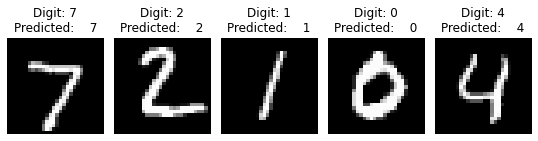

In [33]:
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(5):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.show()

## Exercise 12.03 ##
In the end we can try to use the neural networks we just trained to see if they recognize some handwritten digits. To do so 

In [34]:
X_test_mine= np.zeros([27,28,28])
Y_test_mine= np.empty(27)
for i in range(1,10):
    for j in range(1,4):
        image = PIL.Image.open(f"./myImages/{i}%{j}.png").convert('L')
        array=np.asarray(image)
        X_test_mine[(i-1)*3+j-1]=array
        Y_test_mine[(i-1)*3+j-1]=i

Y_test_mine = keras.utils.to_categorical(Y_test_mine, num_classes)

1/1 [==============================] - 0s 120ms/step - loss: 0.4873 - acc: 0.8889


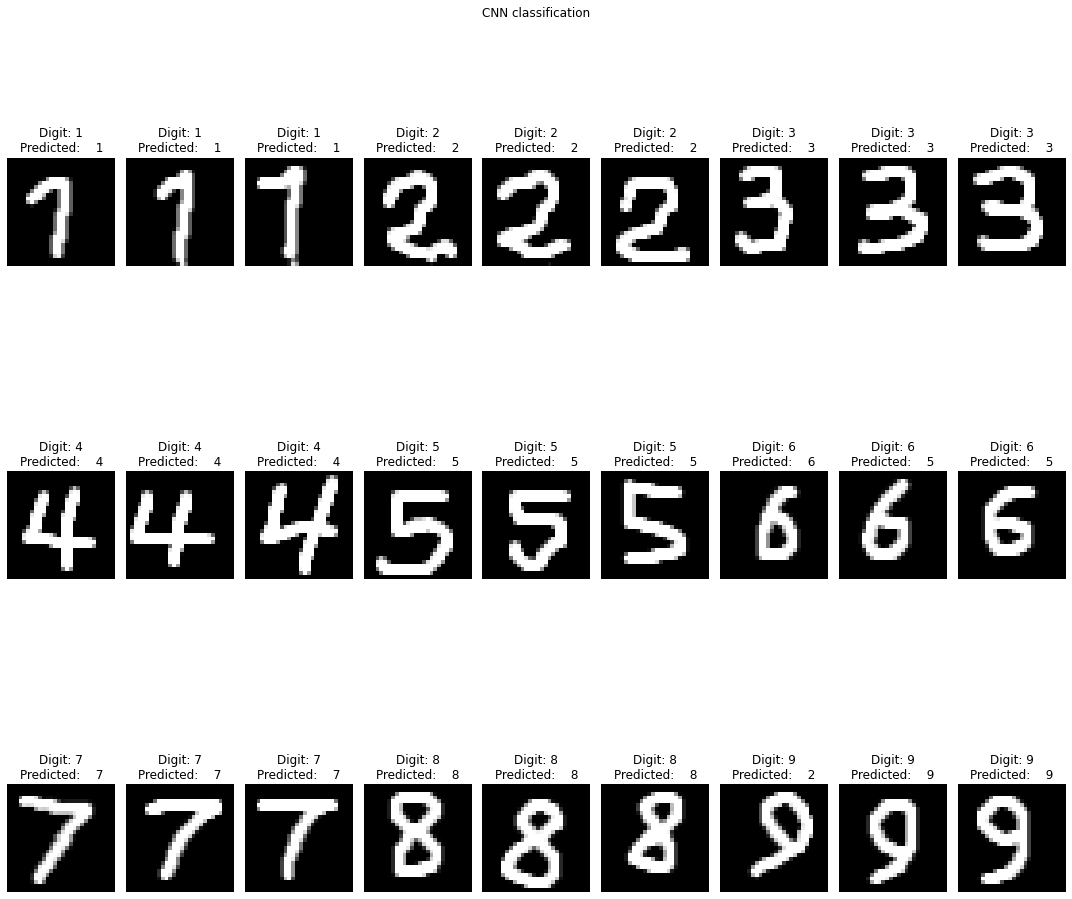

In [35]:
predictions = model_CNN.predict(X_test_mine)
score_CNN = model_CNN.evaluate(X_test_mine, Y_test_mine, verbose=1)
plt.figure(figsize=(15, 15)) 
for i in range(27):    
    ax = plt.subplot(3, 9, i + 1)    
    plt.imshow(X_test_mine[i], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test_mine[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.suptitle('CNN classification')
plt.show()

1/1 [==============================] - 0s 48ms/step


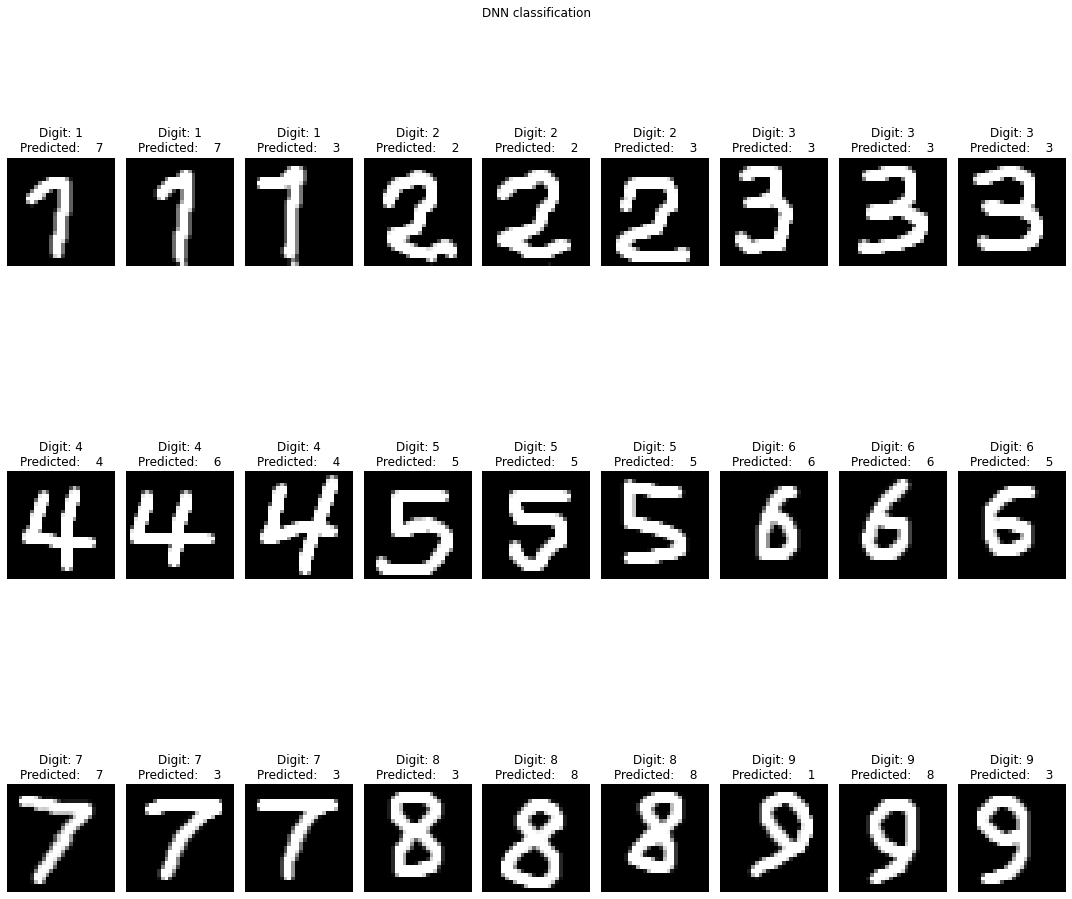

In [36]:

X_test_mine = X_test_mine.reshape(X_test_mine.shape[0], img_rows*img_cols)
score_DNN = model_DNN.evaluate(X_test_mine, Y_test_mine, verbose=1)
predictions = model_DNN.predict(X_test_mine)

plt.figure(figsize=(15, 15)) 
for i in range(27):    
    ax = plt.subplot(3, 9, i + 1)    
    plt.imshow(X_test_mine[i].reshape(img_rows,img_cols), cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test_mine[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.tight_layout()
plt.suptitle('DNN classification')
plt.show()

Here we see a notable result. While the CNN and the DNN reached an accuracy of $>0.95$ on the MNIST dataset, when introducing our handwritten digits the CNN retains an accuracy of $\approx 0.80$ while the DNN drops to an accuracy of $\approx 0.6$. These are not MNIST data, so they could be different from the data the networks are trained on (the pen might be larger, the white balance could be different, and so on), so we are effectively trying to extrapolate.
The CNN is more robust to this process.

## Conclusion ##
In this notebook we explored the results of some simple deep and convolutional neural network on a standard dataset, the MNIST. There are countless possible improvements, this is an active research area. The easiest thing we could implement is data augmentation: we could take the dataset, operates some small transformation on the images and train the neural networks on this new dataset.